## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

## Computer Set Up

In [210]:
!python --version

Python 3.13.5


In [211]:
!conda --version

conda 25.7.0


In [212]:
!git --version

git version 2.51.0.windows.1


**Clone the Repo for our Class**

<a href="https://github.com/Redlands-DATA201/FALL25" target="_blank">Redlands-DATA201/FALL2025</a>

In [213]:
# # Depending on your setup you might need to install modules
# !conda install -y numpy
# !conda install -y pandas
# !conda install -y matplotlib
# !conda install -y plotly

In [214]:
# Some basic package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

# Review of DATA 101

For our review we are going to jump in and do some Exploratory Data Analysis (EDA) on a data set that we have seen before. This time you are just given a .csv file and your goal is to analyze it - answering these questions.

**I expect this to feel impossible at first!!!** but if you all work together, share code, and look things up as needed, I know you can do it!

#### This was a Homework Assignment in Data 101 - but see how much you can figure out on your own!

* Answer the following questions using reproducible Python code.
    - What does it mean to be reproducible? This means someone else at any time in the future can run and understand your code almost like reading a blog post.
* For each question, state your answer in a sentence, e.g. "In this sample, the first three common names of purchasers are ...".
* Note that the answers to all questions are within the context of this particular sample of sales, i.e. you shouldn't make inferences about the population of all Lego sales based on this sample.

0.  Read in the .csv file using Pandas and display it

1.  Describe what you see in the data set (variables, observations, etc)

2.  What are the three most common first names of purchasers?

3.  What are the three most common themes of Lego sets purchased?

4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

5.  Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks

6.  Which age group has purchased the highest number of Lego sets.

7.  Which age group has spent the most money on Legos?

8.  Which Lego theme has made the most money for Lego?

9.  Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. Then using a for loop calculate the average money spent per customer for each area code.

10.  Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

**This exersize comes from: https://datasciencebox.org/course-materials/hw-instructions/hw-05/hw-05-legos**

#### 0. Read in the .csv file using Pandas and display it.

In [215]:
file_name = 'data/lego-sales.csv'

In [216]:
DF = pd.read_csv(file_name)
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2


#### 1. Describe what you see in the data set (variables, observations, etc).

In [217]:
DF.shape

(620, 14)

In [218]:
DF.columns

Index(['first_name', 'last_name', 'age', 'phone_number', 'set_id', 'number',
       'theme', 'subtheme', 'year', 'name', 'pieces', 'us_price', 'image_url',
       'quantity'],
      dtype='object')

In [219]:
DF.dtypes

first_name       object
last_name        object
age               int64
phone_number     object
set_id            int64
number           object
theme            object
subtheme         object
year              int64
name             object
pieces          float64
us_price        float64
image_url        object
quantity          int64
dtype: object

In [220]:
DF.describe()

,age,set_id,year,pieces,us_price,quantity
count,620.000000,620.000000,620.0,551.000000,620.000000,620.000000
mean,34.356452,25124.982258,2018.0,254.206897,29.041613,1.437097
std,11.276537,506.760720,0.0,357.738804,34.630623,0.712849
min,16.000000,24548.000000,2018.0,13.000000,3.990000,1.000000
25%,25.000000,24724.750000,2018.0,70.000000,9.990000,1.000000
50%,33.000000,24804.500000,2018.0,114.000000,19.990000,1.000000
75%,41.000000,25640.250000,2018.0,313.000000,29.990000,2.000000
max,68.000000,26060.000000,2018.0,4634.000000,349.990000,5.000000


There are 620 observations and 14 variables. The variables are 'first_name' (object), 'last_name' (object), 'age' (int), 'phone_number' (object, xxx-xxx-xxxx), 'set_id' (int), 'number' (object), 'theme' (object), 'subtheme' (object), 'year' (int), 'name' (object), 'pieces' (float), 'us_price' (float), 'image_url' (object), 'quantity' (int). The sample contains ages 16 to 68 and the year is 2018.

#### 2. What are the three most common first names of purchasers?

In [221]:
DF['first_name'].value_counts()

first_name
Jackson      13
Jacob        11
Joseph       11
Michael      10
Lucas         8
             ..
Kelly         1
Katelynn      1
Stephanie     1
Miles         1
Talise        1
Name: count, Length: 211, dtype: int64

In this sample, the three most common first names of purchasers are Jackson (13 observations), Jacob (11 observations), and Joseph (11 observations).

#### 3. What are the three most common themes of Lego sets purchased?

In [222]:
top_themes = DF['theme'].value_counts().reset_index().head(4)
top_themes

,theme,count
0,Star Wars,75
1,Nexo Knights,64
2,Mixels,55
3,Gear,55


In this sample, the three most common themes of Lego sets purchased are Star Wars (75 observations), Nexo Knights (64 observations), and Gear (55 observations)/Mixels (55 observations).

#### 4. Among the most common theme of Lego sets purchased, what is the most common subtheme?

In [223]:
# loops for each of the most common themes to display value counts of subthemes
for theme in top_themes['theme']:
    print(theme)
    mask = DF['theme'] == theme
    subtheme = DF[mask]['subtheme'].value_counts()
    print(subtheme)
    print()

Star Wars
subtheme
The Force Awakens            15
Buildable Figures            11
Episode V                    10
MicroFighters                10
Battlefront                   7
Original Content              7
Episode III                   6
Seasonal                      3
Rebels                        3
Episode IV                    2
Ultimate Collector Series     1
Name: count, dtype: int64

Nexo Knights
subtheme
Ultimate    22
Name: count, dtype: int64

Mixels
subtheme
Series 9    21
Series 7    18
Series 8    16
Name: count, dtype: int64

Gear
subtheme
Stationery                  7
Role-Play toys              7
Key Chains/Friends          6
Key Chains/Miscellaneous    6
Key Chains/Ninjago          5
Video Games/PS3             5
Watches/Clocks              4
Key Chains/City             3
Video Games/Wii U           3
Playmats                    2
Video Games/XBOX 360        2
Video Games/3DS             2
Digital Media               2
Digital media               1
Name: count, dty

In this sample, the most common subtheme of Star Wars is The Force Awakens, of Nexo Knights is Ulitmate, of Mixels is Series 9, and of Gear is Stationery and Role-Play toys.

#### 5. Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks

In [236]:
DF['age'].min()

16

In [237]:
DF['age'].max()

68

In [224]:
# creates 'age_group' column that categorizes bins of ages
DF['age_group'] = pd.cut(DF['age'], bins=[15,18,25,35,50,68], labels=['16-18','19-25','26-35','36-50','51-68'])
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_group
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1,19-25
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,26-35
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1,26-35
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1,36-50
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2,16-18
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2,26-35
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1,26-35
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2,36-50


In [225]:
# displays dataframes grouped by age group
groups = DF.groupby('age_group')
for g in groups:
    print(g[0])
    display(g[1])
    print()

C:\Users\josee\AppData\Local\Temp\ipykernel_9596\959442440.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



16-18


,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_group
44,Michelle,Uguccioni,17,NaN,24756,70310,Nexo Knights,NaN,2018,Knighton Battle Blaster,76.0,9.99,http://images.brickset.com/sets/images/70310-1...,1,16-18
45,Michelle,Uguccioni,17,NaN,24896,31046,Creator,NaN,2018,Fast Car,222.0,19.99,http://images.brickset.com/sets/images/31046-1...,1,16-18
70,Lucas,Jimenez-Dominguez,18,712-555-0459,24691,31043,Creator,NaN,2018,Chopper Transporter,124.0,9.99,http://images.brickset.com/sets/images/31043-1...,2,16-18
71,Lucas,Jimenez-Dominguez,18,712-555-0459,26034,41573,Mixels,Series 9,2018,Sweepz,61.0,4.99,NaN,1,16-18
72,Lucas,Jimenez-Dominguez,18,712-555-0459,24704,41140,Disney Princess,Palace Pets,2018,Daisy's Beauty Salon,98.0,9.99,http://images.brickset.com/sets/images/41140-1...,1,16-18
73,Lucas,Jimenez-Dominguez,18,712-555-0459,24903,41558,Mixels,Series 7,2018,Mixadel,63.0,4.99,http://images.brickset.com/sets/images/41558-1...,2,16-18
74,Lucas,Jimenez-Dominguez,18,712-555-0459,26033,41572,Mixels,Series 9,2018,Gobbol,62.0,4.99,NaN,1,16-18
187,Chayanne,Williams,17,869-555-6681,24678,60109,City,Fire,2018,Fire Boat,412.0,79.99,http://images.brickset.com/sets/images/60109-1...,2,16-18
188,Chayanne,Williams,17,869-555-6681,24697,76044,DC Comics Super Heroes,Batman v Superman: Dawn of Justice,2018,Clash of the Heroes,92.0,12.99,http://images.brickset.com/sets/images/76044-1...,1,16-18
223,Michael,Cruz,17,361-555-8212,24723,41172,Elves,NaN,2018,The Water Dragon Adventure,212.0,19.99,http://images.brickset.com/sets/images/41172-1...,1,16-18



19-25


,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_group
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1,19-25
6,Bryanna,Welsh,19,NaN,24797,75138,Star Wars,Episode V,2018,Hoth Attack,233.0,24.99,http://images.brickset.com/sets/images/75138-1...,1,19-25
7,Bryanna,Welsh,19,NaN,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,3,19-25
10,Chase,Fortenberry,19,205-555-3704,24707,10801,Duplo,NaN,2018,Baby Animals,13.0,9.99,http://images.brickset.com/sets/images/10801-1...,1,19-25
11,Chase,Fortenberry,19,205-555-3704,24713,10809,Duplo,NaN,2018,Police Patrol,15.0,14.99,http://images.brickset.com/sets/images/10809-1...,1,19-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Paige,Ice,21,NaN,26038,41577,Mixels,Series 9,2018,Mysto,64.0,4.99,NaN,1,19-25
592,Aiden,Ganley,19,786-555-5067,25639,70324,Nexo Knights,NaN,2018,Merlok's Library 2.0,288.0,24.99,http://images.brickset.com/sets/images/70324-1...,1,19-25
593,Aiden,Ganley,19,786-555-5067,24756,70310,Nexo Knights,NaN,2018,Knighton Battle Blaster,76.0,9.99,http://images.brickset.com/sets/images/70310-1...,2,19-25
608,Carolyn,Quarry,23,567-555-7649,25627,70596,Ninjago,Rise of the Villains,2018,Samurai X Cave Chaos,1253.0,119.99,NaN,2,19-25



26-35


,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_group
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,26-35
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1,26-35
27,Jacob,Nzabanita,31,339-555-2572,24732,41117,Friends,Pop Star,2018,Pop Star TV Studio,194.0,19.99,http://images.brickset.com/sets/images/41117-1...,1,26-35
28,Jacob,Nzabanita,31,339-555-2572,24793,75133,Star Wars,Battlefront,2018,Rebel Alliance Battle Pack,101.0,12.99,http://images.brickset.com/sets/images/75133-1...,2,26-35
29,Jacob,Nzabanita,31,339-555-2572,24723,41172,Elves,NaN,2018,The Water Dragon Adventure,212.0,19.99,http://images.brickset.com/sets/images/41172-1...,1,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,Benjamin,Park,33,NaN,24957,71309,Bionicle,Toa,2018,Onua - Uniter of Earth,143.0,19.99,http://images.brickset.com/sets/images/71309-1...,2,26-35
607,Miles,Hill,34,NaN,24758,70312,Nexo Knights,NaN,2018,Lance's Mecha Horse,237.0,19.99,http://images.brickset.com/sets/images/70312-1...,2,26-35
610,Jennifer,Reinert,29,402-555-0467,24660,71241,Dimensions,Fun Pack,2018,Fun Pack: Slimer,33.0,14.99,http://images.brickset.com/sets/images/71241-1...,3,26-35
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2,26-35



36-50


,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_group
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1,36-50
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,36-50
5,Chelsea,Bouchard,41,NaN,24721,10831,Duplo,NaN,2018,My First Caterpillar,19.0,9.99,http://images.brickset.com/sets/images/10831-1...,1,36-50
8,Caleb,Garcia-Wideman,37,907-555-9236,24730,41115,Friends,NaN,2018,Emma's Creative Workshop,108.0,9.99,http://images.brickset.com/sets/images/41115-1...,1,36-50
9,Caleb,Garcia-Wideman,37,907-555-9236,25611,21127,Minecraft,Minifig-scale,2018,The Fortress,NaN,109.99,http://images.brickset.com/sets/images/21127-1...,2,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Payton,Milsap,42,NaN,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,3,36-50
599,Payton,Milsap,42,NaN,24678,60109,City,Fire,2018,Fire Boat,412.0,79.99,http://images.brickset.com/sets/images/60109-1...,2,36-50
602,Stephanie,Harrison,42,NaN,24736,41121,Friends,Adventure Camp,2018,Adventure Camp Rafting,320.0,29.99,http://images.brickset.com/sets/images/41121-1...,1,36-50
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2,36-50



51-68


,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_group
31,Hannah,Drews Stunkel,55,339-555-6320,25628,70590,Ninjago,NaN,2018,Airjitzu Battle Grounds,666.0,59.99,NaN,1,51-68
32,Hannah,Drews Stunkel,55,339-555-6320,25624,70593,Ninjago,Skybound,2018,The Green NRG Dragon,567.0,49.99,http://images.brickset.com/sets/images/70593-1...,3,51-68
33,Hannah,Drews Stunkel,55,339-555-6320,24734,41119,Friends,NaN,2018,Heartlake Cupcake Cafe,439.0,39.99,http://images.brickset.com/sets/images/41119-1...,1,51-68
38,Riley,Ott,51,517-555-2093,24785,75126,Star Wars,MicroFighters,2018,First Order Snowspeeder,91.0,9.99,http://images.brickset.com/sets/images/75126-1...,2,51-68
39,Riley,Ott,51,517-555-2093,24772,70604,Ninjago,Skybound,2018,Tiger Widow Island,450.0,49.99,http://images.brickset.com/sets/images/70604-1...,1,51-68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,Angel,Payne,62,NaN,25605,75146,Star Wars,Seasonal,2018,Star Wars Advent Calendar,282.0,39.99,http://images.brickset.com/sets/images/75146-1...,4,51-68
553,Angel,Payne,62,NaN,24793,75133,Star Wars,Battlefront,2018,Rebel Alliance Battle Pack,101.0,12.99,http://images.brickset.com/sets/images/75133-1...,1,51-68
594,Dustin,Vanvuuren,51,812-555-1009,24709,10803,Duplo,NaN,2018,Arctic,40.0,29.99,http://images.brickset.com/sets/images/10803-1...,2,51-68
595,Dustin,Vanvuuren,51,812-555-1009,24807,71235,Dimensions,Level Pack,2018,Level Pack: Midway Arcade,96.0,29.99,http://images.brickset.com/sets/images/71235-1...,1,51-68


#### 6. Which age group has purchased the highest number of Lego sets.

In [228]:
# group by age group then sum quantity and sort descending
my_cols = ['age_group','quantity']
DF[my_cols].groupby('age_group').sum().sort_values('quantity',ascending=False)

C:\Users\josee\AppData\Local\Temp\ipykernel_9596\3057669090.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,quantity
age_group,
36-50,313
26-35,267
19-25,174
51-68,92
16-18,45


In this sample, the 36-50 age group has purchased the highest number of Lego sets.

#### 7. Which age group has spent the most money on Legos?

In [229]:
# create revenue column that takes into account quantity of set purchased
DF['us_revenue'] = DF['us_price']*DF['quantity']
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_group,us_revenue
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1,19-25,9.99
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,26-35,119.99
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1,26-35,39.99
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1,36-50,29.99
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,36-50,119.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2,16-18,9.98
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2,26-35,9.98
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1,26-35,19.99
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2,36-50,19.98


In [230]:
# group by age group then sum revenue and sort descending
my_cols = ['age_group','us_revenue']
DF[my_cols].groupby('age_group').sum().sort_values('us_revenue',ascending=False)

C:\Users\josee\AppData\Local\Temp\ipykernel_9596\3276137875.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,us_revenue
age_group,
36-50,9532.87
26-35,7576.33
19-25,4939.26
51-68,2475.08
16-18,948.55


In this sample, the 36-50 age group has spent the most money on Legos ($9,532.87).

#### 8. Which Lego theme has made the most money for Lego?

In [231]:
# group by theme then sum revenue and sort descending
my_cols = ['theme','us_revenue']
DF[my_cols].groupby('theme').sum().sort_values('us_revenue',ascending=False)

,us_revenue
theme,
Star Wars,4447.83
Ninjago,2279.41
City,2211.35
Nexo Knights,2209.07
Minecraft,1549.90
Gear,1533.21
Friends,1279.44
Duplo,1219.50
Elves,1119.72


In this sample, the Star Wars theme has made the most money for Lego ($4,447.83).

#### 9. Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. Then using a for loop calculate the average money spent per customer for each area code.

In [232]:
# create column 'area_code' that takes first three digits of 'phone_number'
DF['area_code'] = DF['phone_number'].apply(lambda x: str(x).split('-')[0])
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_group,us_revenue,area_code
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1,19-25,9.99,216
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,26-35,119.99,819
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1,26-35,39.99,819
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1,36-50,29.99,nan
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,36-50,119.99,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2,16-18,9.98,801
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2,26-35,9.98,784
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1,26-35,19.99,784
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2,36-50,19.98,336


In [239]:
# group by 'area_code' then sum revenue and sort descending
my_cols = ['us_revenue','area_code']
DF[my_cols].groupby('area_code').sum().sort_values('us_revenue',ascending=False).head(4)

,us_revenue
area_code,
nan,3992.64
956,719.96
973,684.91
567,549.86


In this sample, the 956 area code has spent the most money on Legos ($719.96).

In [234]:
# group df by area code then loop for each area code
# calculate total spent and number of customers then calculate average
# print to two decimal places
my_cols = ['area_code','us_revenue']
areas = DF[my_cols].groupby('area_code')
for a in areas:
    print("area code:",a[0])
    total_spent = a[1]['us_revenue'].sum()
    print(f"total spent:${total_spent:.2f}")
    n_customers = len(a[1])
    print("number of customers:",n_customers)
    avg_spent_per_customer = total_spent/n_customers
    print(f"average money spent per customer:${avg_spent_per_customer:.2f}")
    print()

area code: 205
total spent:$209.89
number of customers: 7
average money spent per customer:$29.98

area code: 206
total spent:$49.98
number of customers: 1
average money spent per customer:$49.98

area code: 209
total spent:$349.94
number of customers: 5
average money spent per customer:$69.99

area code: 210
total spent:$209.95
number of customers: 4
average money spent per customer:$52.49

area code: 212
total spent:$24.99
number of customers: 1
average money spent per customer:$24.99

area code: 214
total spent:$229.91
number of customers: 5
average money spent per customer:$45.98

area code: 215
total spent:$70.94
number of customers: 3
average money spent per customer:$23.65

area code: 216
total spent:$9.99
number of customers: 1
average money spent per customer:$9.99

area code: 225
total spent:$87.95
number of customers: 4
average money spent per customer:$21.99

area code: 229
total spent:$74.95
number of customers: 5
average money spent per customer:$14.99

area code: 246
tot

#### 10. Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

Is there an association between number of pieces in a Lego set and the price?

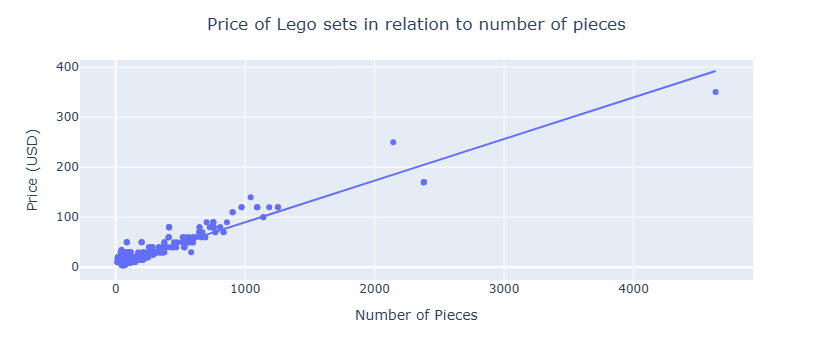

In [235]:
my_cols = ['pieces','us_price']
fig = px.scatter(DF[my_cols],
                   x = 'pieces',
                   y = 'us_price',
                   trendline="ols")
fig.update_layout(title = 'Price of Lego sets in relation to number of pieces',
                  title_x = 0.5,
                  xaxis_title = 'Number of Pieces',
                  yaxis_title = 'Price (USD)')
fig.show()

From this visualization, it appears that in this sample, the price of the Lego set increases while the number of pieces increases. This suggets there is a positive assocation and that the greater the number of pieces, the greater the price.